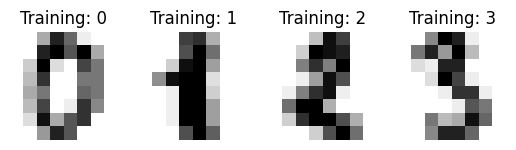

羅吉斯迴歸進行數字(Digit)影像預測: [9 4 6 6 5 7 7 0 2 9 1 0 0 4 6 0 9 1 5 0 5 7 6 8 2 2 5 5 9 2]
數字(Digit)影像真實值: [7 4 6 6 5 7 7 0 2 9 1 0 0 4 6 0 9 1 5 0 5 7 6 8 2 2 5 5 9 2]
數字(Digits)影像預測準確率 0.97
羅吉斯迴歸進行IRIS預測: [1 2 0 2 2 2 2 1 1 0 2 2 1 0 2 1 0 0 0 1 1 1 0 1 1 1 0 0 2 0]
IRIS真實值: [1 2 0 2 2 2 2 1 1 0 2 2 1 0 2 1 0 0 0 1 1 1 0 1 1 1 0 0 2 0]
IRIS預測準確率 1.0


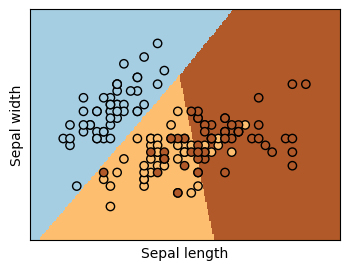

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")

def load_datasets():
    return datasets.load_digits(),datasets.load_iris()

def LogisticImage(data):

    n_samples = len(data.images)
    data_images = data.images.reshape((n_samples, -1))
    train_data, test_data, train_label, test_label = train_test_split(data_images, data.target, test_size=0.2)
    clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000,
                             multi_class='multinomial').fit(train_data, train_label) #lbfgs：optimizer 適用於多類別分類（multinomial）

    print('羅吉斯迴歸進行數字(Digit)影像預測:' ,clf.predict(test_data)[:30])
    print('數字(Digit)影像真實值:' ,test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("數字(Digits)影像預測準確率", round(acc, 2))

def LogisticValue(data):

    train_data, test_data, train_label, test_label = train_test_split(data.data, data.target, test_size=0.2)

    clf = LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial')
    clf.fit(train_data,train_label)
    print('羅吉斯迴歸進行IRIS預測:' ,clf.predict(test_data)[:30])
    print('IRIS真實值:' ,test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("IRIS預測準確率", round(acc, 2))

def show_digits_images(data):
    for i in range(0, 4):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        imside = int(np.sqrt(data.data[i].shape[0]))
        im1 = np.reshape(data.data[i], (imside, imside))
        plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: {}'.format(data.target[i]))
    plt.show()

def plot_Logistic_Regression(data):
    X = data.data[:, :2]  # we only take the first two features.
    Y = data.target

    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial') # c：決定模型對錯誤分類的懲罰程度，數學上它是L2正則化(Ridge Regularization)強度的倒數、數據量較小（如iris只有150筆資料)，可以使用較大的C，確保模型學習更多數據細節，default = 1

    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

digits,iris = load_datasets()

#print("IRIS 特徵： \n", iris.data )
#print("IRIS 真實值： \n", iris.target )
#print("Digit 特徵： \n", digits.data )
#print("Digit 真實值： \n", digits.target )
show_digits_images(digits)

LogisticImage(digits)
LogisticValue(iris)
plot_Logistic_Regression(iris)
